In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.datasets import make_regression
from matplotlib import pyplot
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

print(tf.__version__)

2.4.1


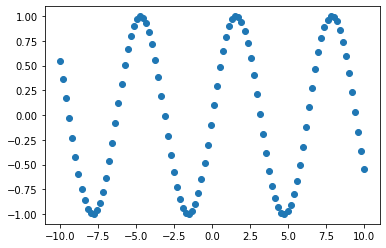

In [33]:
def gen_sin(b,e,n):
    x = np.linspace(b, e, n)
    y = np.sin(x)
    return x, y

x,y = gen_sin(-10,10,100)
pyplot.scatter(x,y)
pyplot.show()



In [34]:
def plot_X1_Model(_x, _y):
  plt.scatter(test_features, test_labels, label='Data')
  plt.plot(_x, _y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

def plot_loss(history, ylim=[0, 100]):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)  

def get_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
            end_ix = i + n_steps
            if end_ix > len(sequence)-1:
                    break
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
            X.append(seq_x)
            y.append(seq_y)
    return np.array(X), np.array(y)  

## Create simple dataset

In [54]:
train_features1, train_labels1 = gen_sin(-10,10,100)
test_features1, test_labels1 = gen_sin(-30,-10,400)
test_s_features1, test_s_labels1 = gen_sin(-5,5,20)

display(train_features1[:10])
display(test_features1[:10])
display(test_s_features1[:10])

array([-10.0000, -9.7980, -9.5960, -9.3939, -9.1919, -8.9899, -8.7879,
       -8.5859, -8.3838, -8.1818])

array([-30.0000, -29.9499, -29.8997, -29.8496, -29.7995, -29.7494,
       -29.6992, -29.6491, -29.5990, -29.5489])

array([-5.0000, -4.4737, -3.9474, -3.4211, -2.8947, -2.3684, -1.8421,
       -1.3158, -0.7895, -0.2632])

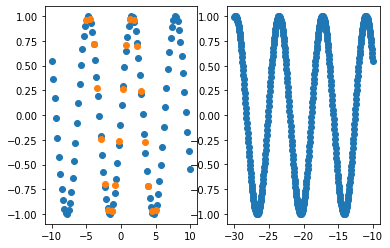

In [55]:
pyplot.subplot(1, 2, 1)
pyplot.scatter(train_features1,train_labels1)
pyplot.subplot(1, 2, 2)
pyplot.scatter(test_features1,test_labels1)
pyplot.subplot(1, 2, 1)
pyplot.scatter(test_s_features1,test_s_labels1)
pyplot.show()

In [56]:
layer_normalizer = preprocessing.Normalization()
layer_normalizer.adapt(train_features1)
train_features1 = layer_normalizer(train_features1).numpy().flatten()
test_features1 = layer_normalizer(test_features1).numpy().flatten()
test_s_features1 = layer_normalizer(test_s_features1).numpy().flatten()


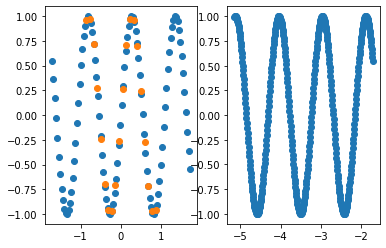

In [57]:
pyplot.subplot(1, 2, 1)
pyplot.scatter(train_features1,train_labels1)
pyplot.subplot(1, 2, 2)
pyplot.scatter(test_features1,test_labels1)
pyplot.subplot(1, 2, 1)
pyplot.scatter(test_s_features1,test_s_labels1)
pyplot.show()

In [58]:
n_step = 10
train_features, train_labels = get_sequence(train_labels1,n_step)
test_features, test_labels = get_sequence(test_labels1,n_step)
test_s_features, test_s_labels = get_sequence(test_s_labels1,n_step)


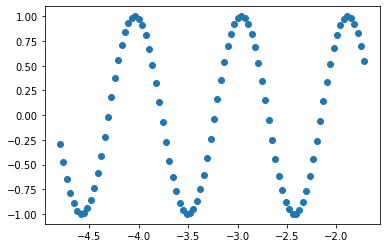

In [52]:
pyplot.scatter(test_features1[n_step:],test_labels)
pyplot.show()

## Create Network

In [15]:
#model 
inputs = tf.keras.Input(shape=(train_features.shape[1],))
x = tf.keras.layers.Dense(30, activation=tf.nn.tanh)(inputs)
x = tf.keras.layers.Dense(20, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)(x)

outputs = tf.keras.layers.Dense(1)(x)
X1_model = tf.keras.Model(inputs=inputs, outputs=outputs)

display(X1_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


None

In [16]:
# test prediction shape
display(X1_model.predict(train_features[:2]))

array([[0.5742],
       [0.6030]], dtype=float32)

In [17]:
#compile model 
X1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mse')

In [18]:
%%time
#train model X1
history_X1 = X1_model.fit(
    train_features, train_labels,
    epochs=500,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 25 s, sys: 1.11 s, total: 26.1 s
Wall time: 23.1 s


In [19]:
hist_X1 = pd.DataFrame(history_X1.history)
hist_X1['epoch'] = history_X1.epoch
display(hist_X1.tail(2))

,loss,val_loss,epoch
498,0.000007,0.000013,498
499,0.000008,0.000036,499


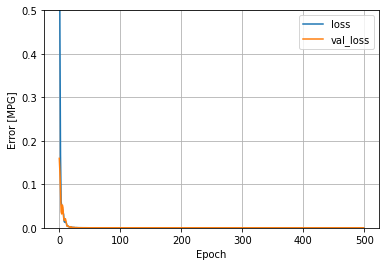

In [20]:
plot_loss(history_X1, [0,0.5])

In [21]:
test_results = {}

test_results['X1_trains'] = X1_model.evaluate(
    train_features,
    train_labels, verbose=0)

test_results['X1_test'] = X1_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results['X1_s_trains'] = X1_model.evaluate(
    test_s_features,
    test_s_labels, verbose=0)    

display(test_results)    

{'X1_trains': 2.1865371309104376e-05,
 'X1_test': 2.684611354197841e-05,
 'X1_s_trains': 1.381455659866333}

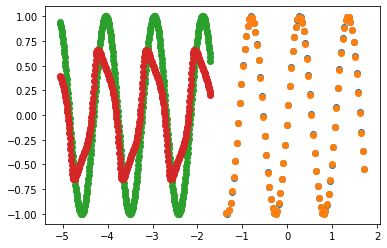

In [59]:
pyplot.scatter(train_features1[n_step:],train_labels)
pyplot.scatter(train_features1[n_step:],X1_model.predict(train_features))
pyplot.scatter(test_features1[n_step:],test_labels)
pyplot.scatter(test_features1[n_step:],X1_model.predict(test_features))
pyplot.show()

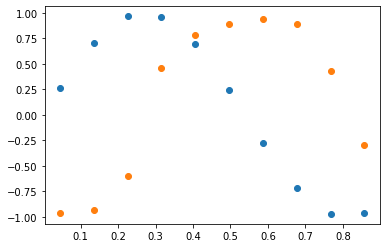

In [30]:
test_s_features1
pyplot.scatter(test_s_features1[n_step:],test_s_labels)
pyplot.scatter(test_s_features1[n_step:],X1_model.predict(test_s_features))